In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

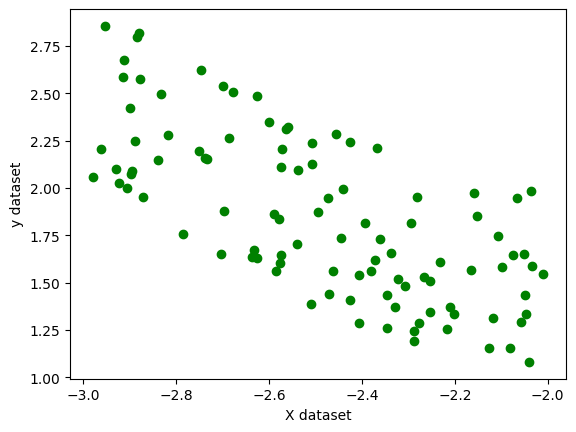

In [8]:
# to get random values, 3 is subtracted to also add outliers to data
X = np.random.rand(100,1)-3
# this is quadratic eq, random is added to add outliers in data (y = 0.5x^2 + 1.5x + 2 + outliers)
Y = 0.5 * X**2 + 1.5*X +2 + np.random.rand(100,1)


# we are just checking pattern of our random data set by plotting it

plt.scatter(X,Y,color="green")
plt.xlabel('X dataset')
plt.ylabel('y dataset')
plt.show()



In [12]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=42)


In [13]:
# lets implement simple linear regression to see what will be wrong if we use simple linear regression on non-linear pattern
from sklearn.linear_model import LinearRegression
regression_1 = LinearRegression()
regression_1.fit(X_train,Y_train)


LinearRegression()

In [14]:
from sklearn.metrics import r2_score
sscore = r2_score(Y_test,regression_1.predict(X_test))
print(sscore)
# the accuracy will be very less 

0.6323952483354899


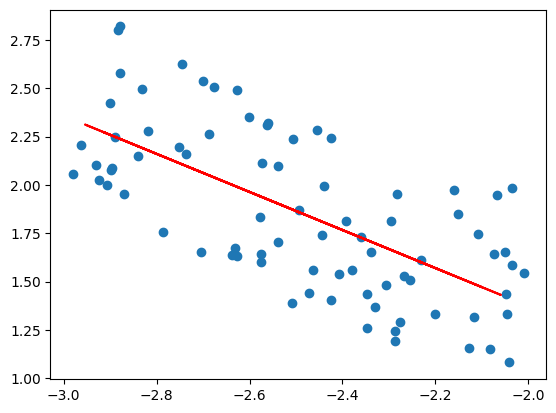

In [15]:
# lets visualize this model
plt.scatter(X_train,Y_train)
plt.plot(X_test,regression_1.predict(X_test),color='red')

# we can see its not at all a good fit model


now we will use polynomial regression and increase degree to 2 as earlier we used simple linear reg model which is  = degree 1, now we use degree = 2, 
 if that doesnt work well and give us best fit line then we will further increase degree




In [46]:
# lets apply polynomial transformation (for degree)
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree = 2,include_bias=True)
# include bias se BO(1) wala 1 create hora, and degree =2 se x**2 create hora of the eq, we'll usee these 3 to train our model. 1,x,x**2

X_train_poly_train = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)



In [47]:
# we have 3 columns now for x train and x test, 1,x,x*2
X_train_poly_train

array([[ 1.        , -2.53865827,  6.44478581],
       [ 1.        , -2.27628529,  5.18147474],
       [ 1.        , -2.29527516,  5.26828804],
       [ 1.        , -2.15864082,  4.65973019],
       [ 1.        , -2.75143802,  7.57041115],
       [ 1.        , -2.69991197,  7.28952466],
       [ 1.        , -2.68694378,  7.21966688],
       [ 1.        , -2.57758851,  6.64396253],
       [ 1.        , -2.74634647,  7.54241891],
       [ 1.        , -2.07411668,  4.30195999],
       [ 1.        , -2.34674437,  5.50720912],
       [ 1.        , -2.32900472,  5.42426298],
       [ 1.        , -2.53911953,  6.44712799],
       [ 1.        , -2.88956769,  8.34960143],
       [ 1.        , -2.2670986 ,  5.13973607],
       [ 1.        , -2.28683767,  5.22962652],
       [ 1.        , -2.90689493,  8.45003814],
       [ 1.        , -2.92366471,  8.54781534],
       [ 1.        , -2.38000965,  5.66444595],
       [ 1.        , -2.78631515,  7.76355214],
       [ 1.        , -2.12687516,  4.523

In [48]:
from sklearn.metrics import r2_score
regression = LinearRegression()
regression.fit(X_train_poly_train,Y_train)
Y_pred = regression.predict(X_test_poly)
score_1 = r2_score(Y_test,Y_pred)
print(score_1)


0.6583431520189724


In [49]:
print(regression.coef_)

[[0.         1.12021888 0.42273146]]


In [50]:
print(regression.intercept_)

[1.98946207]


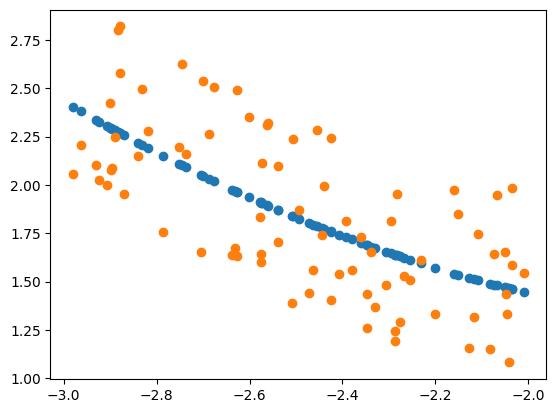

In [51]:
# for the yellow datapoints blue one is the best fit line
plt.scatter(X_train,regression.predict(X_train_poly_train))
plt.scatter(X_train,Y_train)


if we use degree = 3 check r2 score again, there isnt much difference, so let it be degree =2, if accuracy score increases drasticslly then use degree = 3 or any further


In [52]:
# prediction of new dataset
X_new = np.linspace(-3,3,200).reshape(200,1)
x_new_poly = poly.transform(X_new)
x_new_poly

array([[ 1.00000000e+00, -3.00000000e+00,  9.00000000e+00],
       [ 1.00000000e+00, -2.96984925e+00,  8.82000455e+00],
       [ 1.00000000e+00, -2.93969849e+00,  8.64182723e+00],
       [ 1.00000000e+00, -2.90954774e+00,  8.46546804e+00],
       [ 1.00000000e+00, -2.87939698e+00,  8.29092700e+00],
       [ 1.00000000e+00, -2.84924623e+00,  8.11820409e+00],
       [ 1.00000000e+00, -2.81909548e+00,  7.94729931e+00],
       [ 1.00000000e+00, -2.78894472e+00,  7.77821267e+00],
       [ 1.00000000e+00, -2.75879397e+00,  7.61094417e+00],
       [ 1.00000000e+00, -2.72864322e+00,  7.44549380e+00],
       [ 1.00000000e+00, -2.69849246e+00,  7.28186157e+00],
       [ 1.00000000e+00, -2.66834171e+00,  7.12004747e+00],
       [ 1.00000000e+00, -2.63819095e+00,  6.96005151e+00],
       [ 1.00000000e+00, -2.60804020e+00,  6.80187369e+00],
       [ 1.00000000e+00, -2.57788945e+00,  6.64551400e+00],
       [ 1.00000000e+00, -2.54773869e+00,  6.49097245e+00],
       [ 1.00000000e+00, -2.51758794e+00

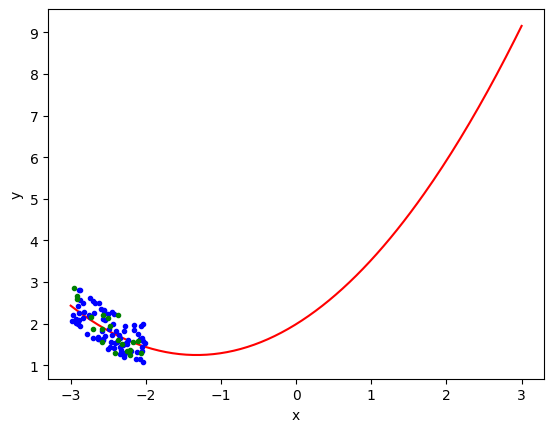

In [53]:
y_new = regression.predict(x_new_poly)
plt.plot(X_new,y_new,"r-",label='Predictions')
plt.plot(X_train,Y_train,"b.",linewidth=2,label='Training points')
plt.plot(X_test,Y_test,"g.",linewidth=2,label='Testing points')
plt.xlabel('x')
plt.ylabel('y')
plt.show()


## Pipeline

In [54]:
from sklearn.pipeline import Pipeline


with pipelining we are combining two models here, poly_features and lin_regression. as soon as we write poly regression and pass degree as parameter, first poly_feature model will work and then linear regression, one after the other, on its own coz they both are in pipeline

In [57]:
def poly_regression(degree):
    X_new = np.linspace(-3,3,200).reshape(200,1)
    poly_features = PolynomialFeatures(degree = degree,include_bias = True)
    lin_reg = LinearRegression()
    poly_regression = Pipeline([
        ("poly features",poly_features),("lin reg",lin_reg)])
    poly_regression.fit(X_train,Y_train)
    # here also first it will create poly features (acc to degree) and then predict y values
    y_pred_new = poly_regression.predict(X_new)
    #plotting prediction line
    plt.plot(X_new,y_pred_new,'r',label='degree' + str(degree),linewidth=2)
    plt.plot(X_train,Y_train,'b.',linewidth=3)
    plt.plot(X_test,Y_test,'g.',linewidth=3)
    plt.legend(loc='upper left')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.axis([-4,4,0,10])
    plt.show()



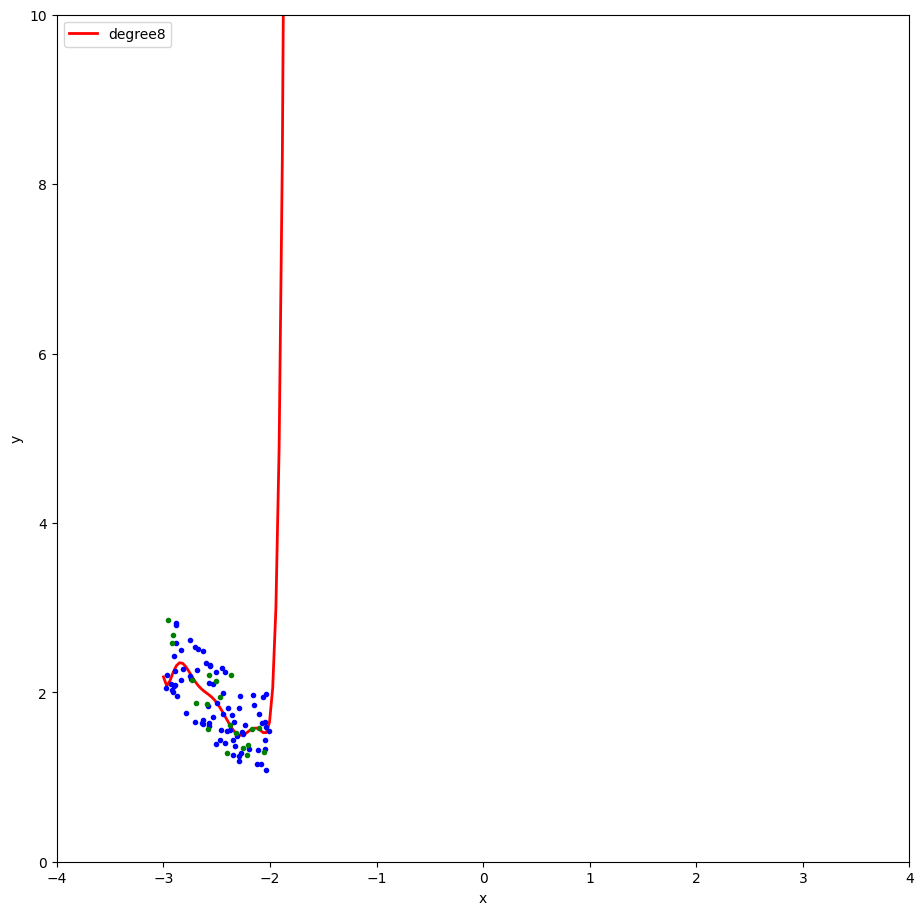

In [71]:
plt.figure(figsize=(11,11))
poly_regression(8)
